In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## load data

In [2]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')
data = train_csv.append(test_csv)
data.reset_index(inplace = True, drop = True)
print(data)
print()

             Date  Open Price  Close Price  High Price  Low Price      Volume
0     02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1     05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2     06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3     07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4     08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
...           ...         ...          ...         ...        ...         ...
2511  24-Dec-2018     2400.56      2351.10     2410.34    2351.10  1662758784
2512  26-Dec-2018     2363.12      2467.70     2467.76    2346.58  2611875072
2513  27-Dec-2018     2442.50      2488.83     2489.10    2397.94  2386466304
2514  28-Dec-2018     2498.77      2485.74     2520.27    2472.89  2080726656
2515  31-Dec-2018     2498.94      2506.85     2509.24    2482.82  1912680064

[2516 rows x 6 columns]



In [3]:
print('train')
print(train_csv.describe())
print(train_csv.info())
print('test')
print(test_csv.describe())
print(test_csv.info())
print(train_csv.head())

train
        Open Price  Close Price   High Price    Low Price        Volume
count  2264.000000  2264.000000  2264.000000  2264.000000  2.264000e+03
mean   1656.142686  1656.767562  1664.427054  1647.425128  2.948755e+09
std     485.292193   485.226120   484.808706   485.576116  1.351675e+09
min     679.280000   676.530000   695.270000   666.790000  5.181584e+08
25%    1238.602500  1239.337500  1246.695000  1227.587500  2.048980e+09
50%    1649.135000  1650.405000  1656.145000  1639.600000  2.506637e+09
75%    2070.300000  2071.190000  2079.507500  2058.757500  3.373334e+09
max    2692.710000  2690.160000  2694.970000  2685.920000  9.120100e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2264 non-null   object 
 1   Open Price   2264 non-null   float64
 2   Close Price  2264 non-null   float64
 3   High Price   2264 non-nul

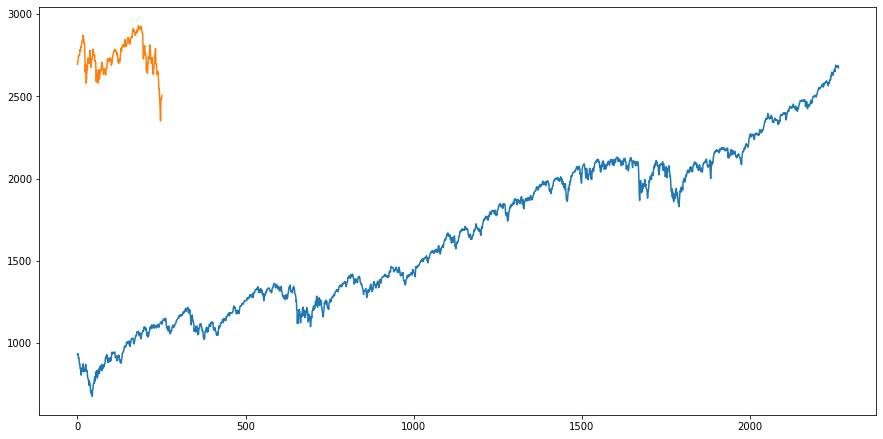

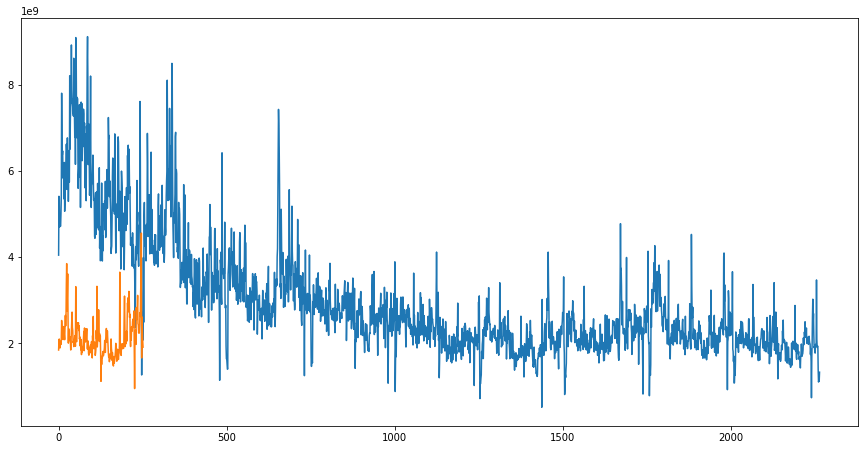

array([[ 1.        , -0.72889614],
       [-0.72889614,  1.        ]])

In [4]:
plt.figure(figsize = (15, 7.5))
plt.plot(range(len(train_csv)),train_csv['Close Price'])
plt.plot(range(len(test_csv)), test_csv['Close Price'])
plt.show()
plt.figure(figsize = (15, 7.5))
plt.plot(range(len(train_csv)), train_csv['Volume'])
plt.plot(range(len(test_csv)), test_csv['Volume'])
plt.show()
np.corrcoef(train_csv['Close Price'], train_csv['Volume'])

## find relationsheep

In [5]:
np.corrcoef(data['Close Price'], data['High Price'] - data['Low Price'])

array([[1.        , 0.14495399],
       [0.14495399, 1.        ]])

In [6]:
np.corrcoef(data['Close Price'], data['Volume'])

array([[ 1.        , -0.68743956],
       [-0.68743956,  1.        ]])

In [7]:
np.corrcoef(data['Close Price'], data['Open Price'])

array([[1.       , 0.9996377],
       [0.9996377, 1.       ]])

In [8]:
np.corrcoef(data['Close Price'], data['High Price'])

array([[1.        , 0.99981104],
       [0.99981104, 1.        ]])

In [9]:
np.corrcoef(data['Close Price'], data['Low Price'])

array([[1.        , 0.99985281],
       [0.99985281, 1.        ]])

## data processing

## 日線

[[1.         0.08066177]
 [0.08066177 1.        ]]
slope:  count    2516.000000
mean        0.626014
std        16.513231
min      -113.190000
25%        -6.217500
50%         0.990000
75%         8.902500
max       116.600000
Name: slope_result, dtype: float64


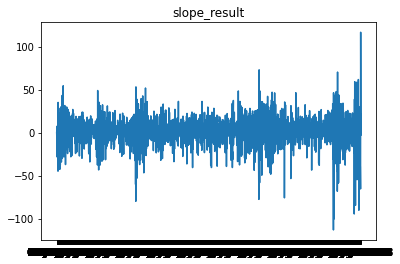

In [10]:

label = [0]
## add season feature
season = []
for i in data['Date']:
    s = i.split('-')
    #print(s)
    if(s[1] == 'Jan' or s[1] == 'Feb' or s[1] == 'Mar'):
        season.append(1)
    elif(s[1] == 'Apr' or s[1] == 'May' or s[1] == 'Jun'):
        season.append(2)
    elif(s[1] == 'Jul' or s[1] == 'Aug' or s[1] == 'Sep'):
        season.append(3)
    else:
        season.append(4)
season = pd.Series(season)
data['season'] = season

print(np.corrcoef(data['Close Price'], data['season'])) # season relationsheep with Close Price
#label encoding & add the gap between close price everyday
#1 is up 0 is down
standard = 0
one = 0
slope = [0]
for i in data['Close Price']:
    if(one == 0):
        one = 1
    else:
        if(i - standard > 0):
            slope.append(i-standard)
            label.append(1)
        else:
            slope.append(i-standard)
            label.append(0)
    standard = i
slope = pd.Series(slope)
data['slope_result'] = slope
plt.title('slope_result')
plt.plot(data['Date'], data['slope_result'])
print('slope: ' ,data['slope_result'].describe())



In [11]:
day_slope = [0]
#0 is down 1 is up for 30 days
for i in range(len(data['Close Price'])):
    if(i == 0):
        continue
    if(data['Close Price'].iloc[i] - data['Close Price'].iloc[i-1] > 0):
        day_slope.append(1)
    else:
        day_slope.append(0)
day_slope = np.array(day_slope)
data['slope_d'] = day_slope

## 月均線

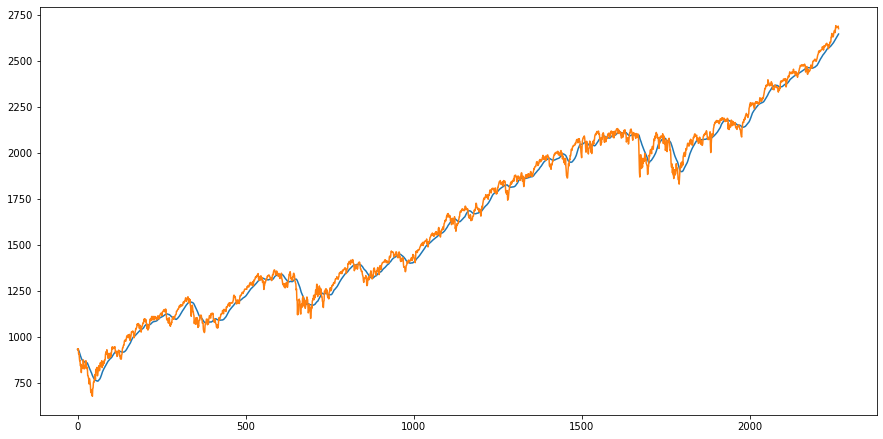

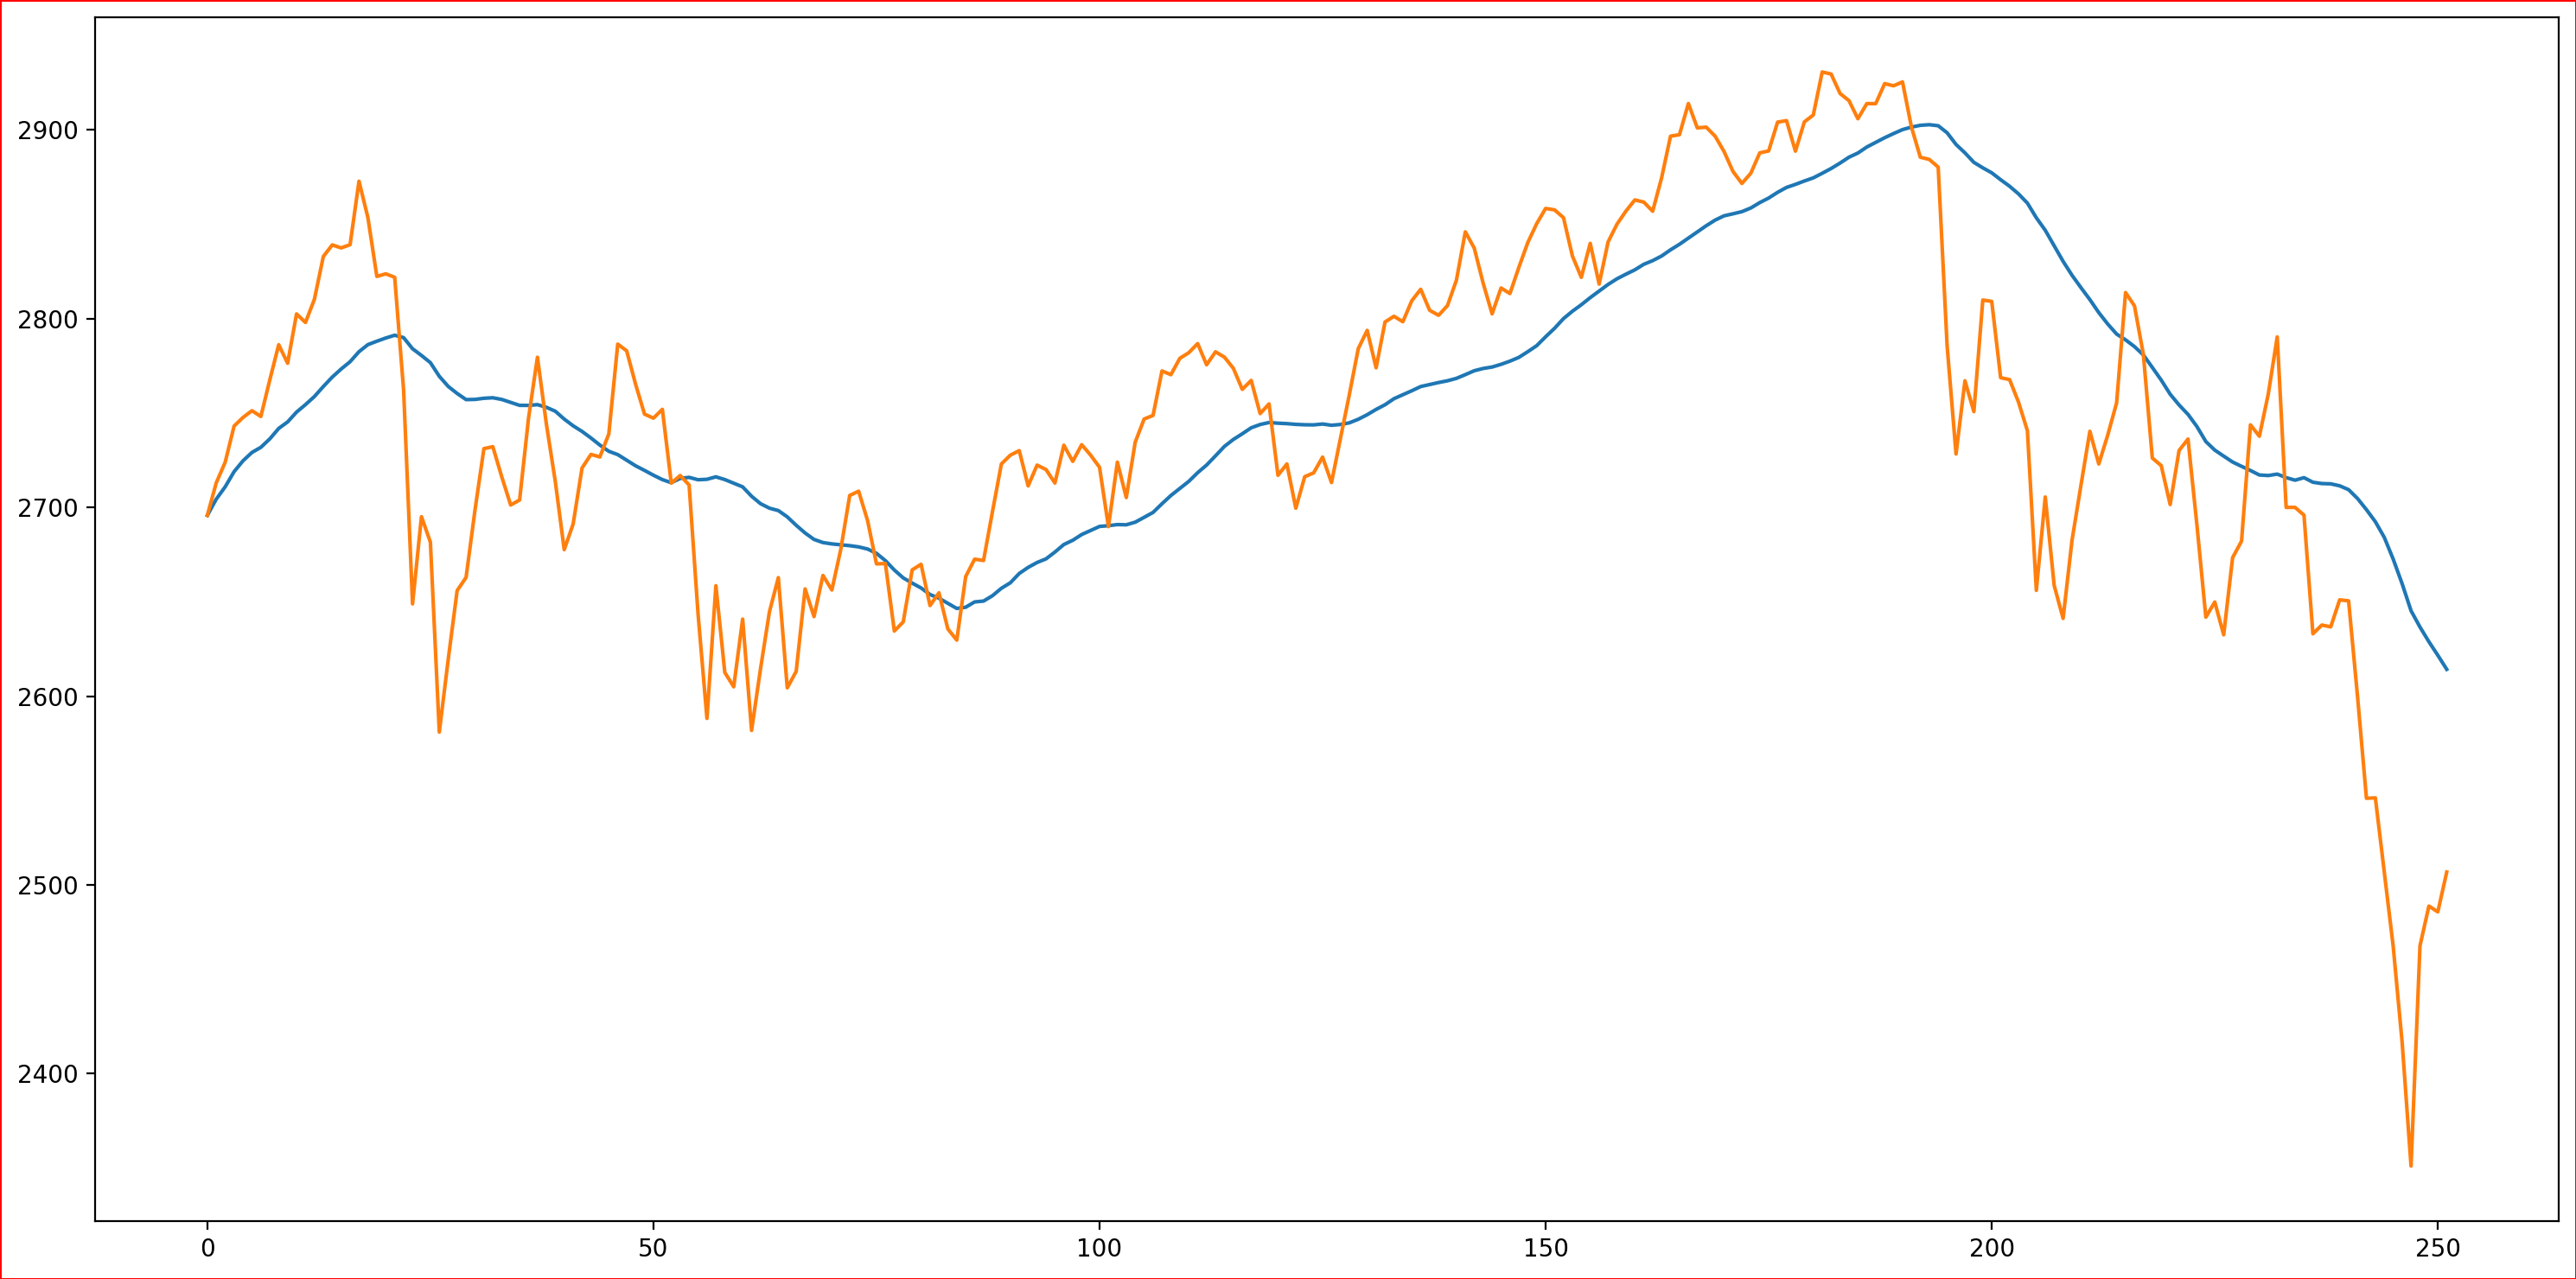

In [12]:
var = 30 #var day moving rate
#30 day moveing average
#train data
month_average = []
tmp=0

for i in range(len(train_csv)):
    if(i < var):
        tmp = tmp + data['Close Price'][i]
        month_average.append(tmp/(i+1))
    else:
        tmp = tmp + data['Close Price'][i] -data['Close Price'][i - var]
        month_average.append(tmp/var)
plt.figure(figsize = (15, 7.5))
plt.plot(range(len(train_csv)), month_average)
plt.plot(range(len(train_csv)), data['Close Price'][:len(train_csv)])
plt.show()




#test data
tmp=0
for i in range(len(train_csv), len(train_csv)+len(test_csv)):
    #print(i)
    if(i < len(train_csv)+var):
        tmp = tmp + data['Close Price'][i]
        month_average.append(tmp/(i-len(train_csv)+1))
    else:
        tmp = tmp + data['Close Price'][i] - data['Close Price'][i - var]
        month_average.append(tmp/var)


plt.figure(figsize=(15, 7.5), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')
plt.plot(range(len(test_csv)), month_average[len(train_csv):])
plt.plot(range(len(test_csv)), data['Close Price'][len(train_csv):])
plt.show()


month_slope = [0]
#0 is down 1 is up for 30 days
for i in range(len(data['Close Price'])):
    if(i == 0):
        continue
    if(month_average[i] - month_average[i-1] > 0):
        month_slope.append(1)
    else:
        month_slope.append(0)
month_slope = np.array(month_slope)
data['slope_m'] = month_slope



##  五日均線

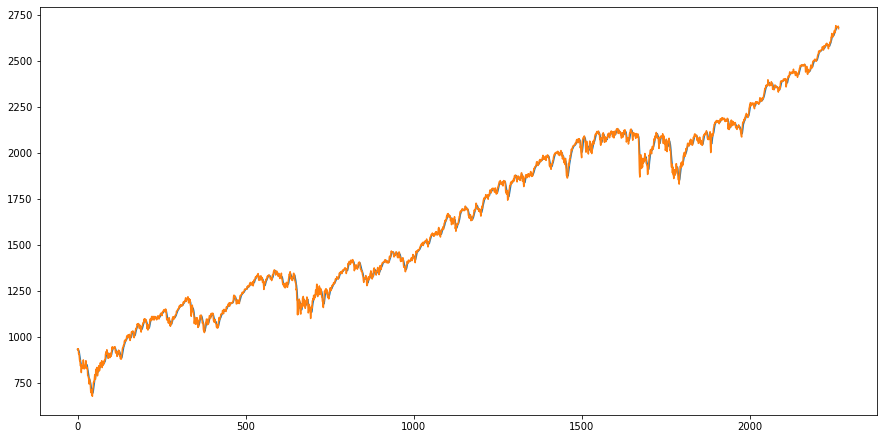

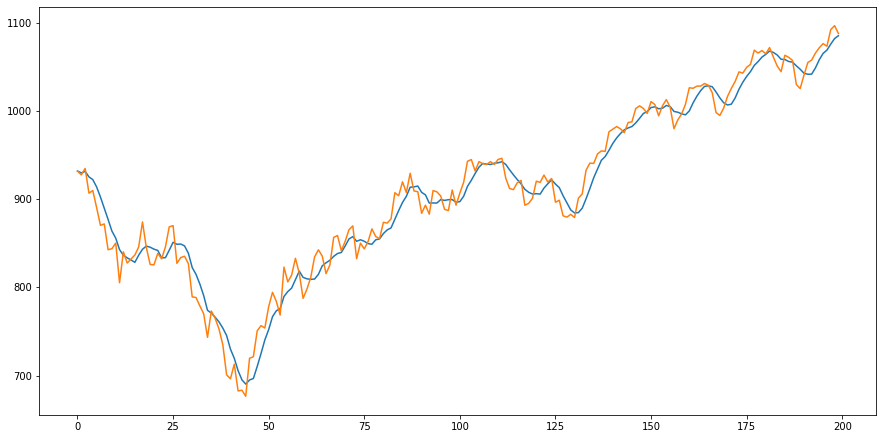

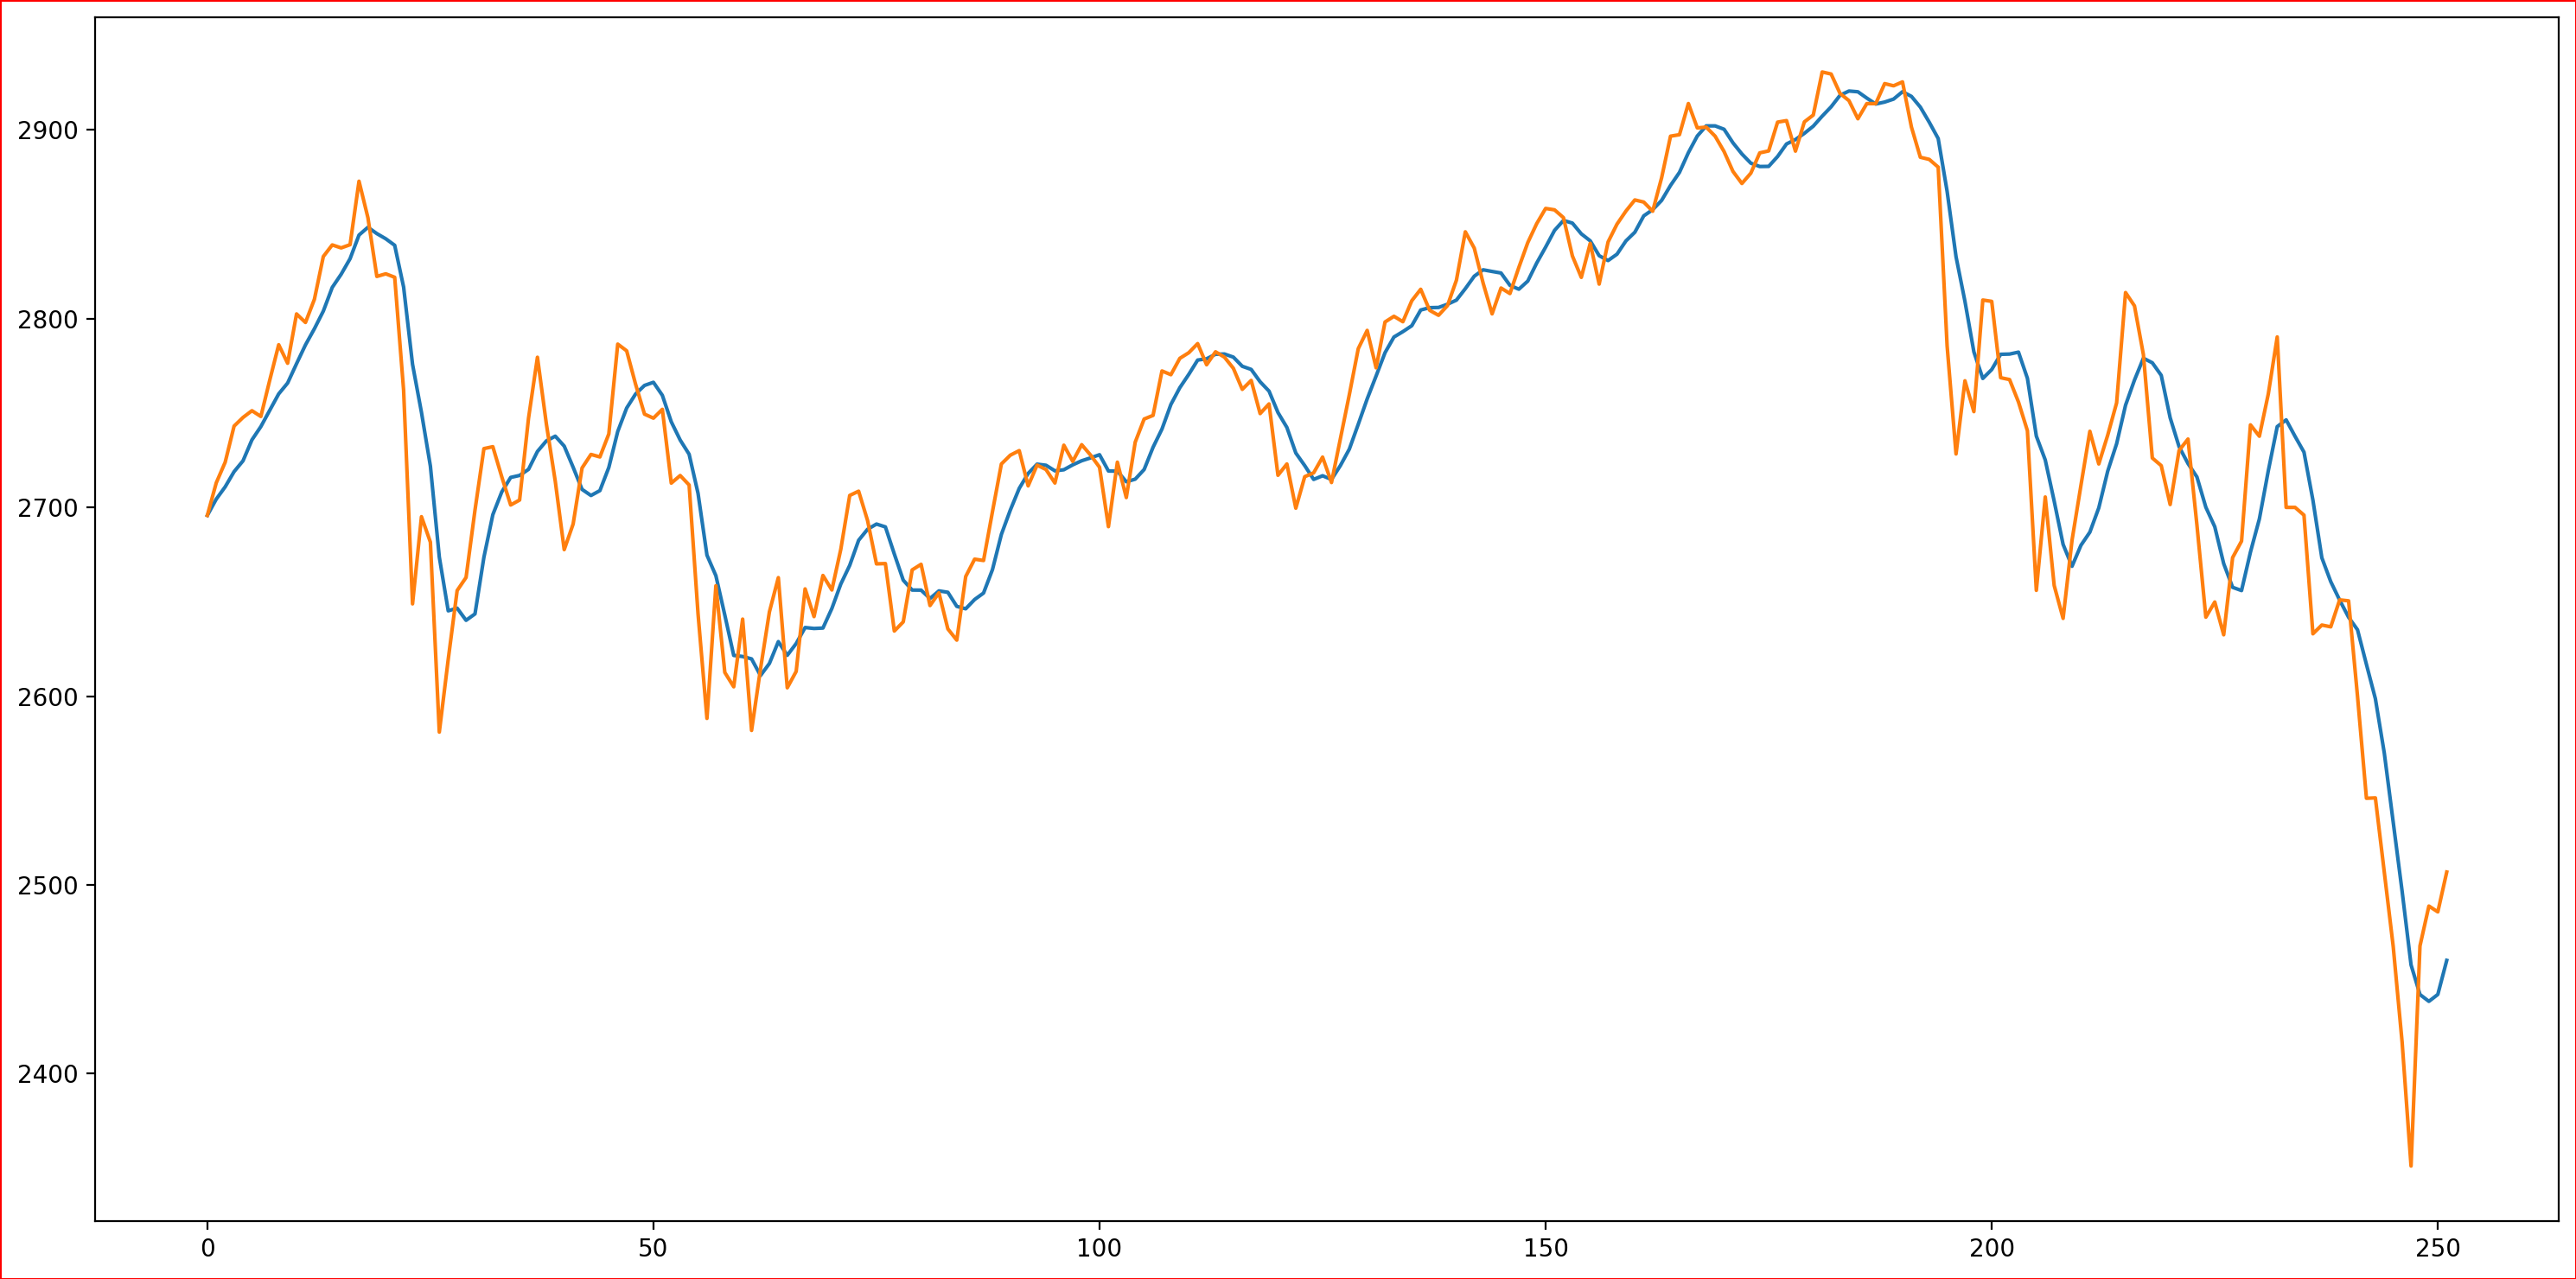

In [13]:

#5 day moveing average
#train data
week_average = []

mask = np.zeros(0)
tmp=0

for i in range(len(train_csv)):
    if(i < 5):
        tmp = tmp + data['Close Price'][i]
        week_average.append(tmp/(i+1))
    else:
        tmp = tmp + data['Close Price'][i] -data['Close Price'][i - 5]
        week_average.append(tmp/5)
plt.figure(figsize = (15, 7.5))
plt.plot(range(len(train_csv)), week_average)
plt.plot(range(len(train_csv)), data['Close Price'][:len(train_csv)])
plt.show()


plt.figure(figsize = (15, 7.5))
plt.plot(range(200), week_average[:200])
plt.plot(range(200), data['Close Price'][:200])
plt.show()

#test data
tmp=0
for i in range(len(train_csv), len(train_csv)+len(test_csv)):
    #print(i)
    if(i < len(train_csv)+5):
        tmp = tmp + data['Close Price'][i]
        week_average.append(tmp/(i-len(train_csv)+1))
    else:
        tmp = tmp + data['Close Price'][i] -data['Close Price'][i - 5]
        week_average.append(tmp/5)


plt.figure(figsize=(15, 7.5), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')
plt.plot(range(len(test_csv)), week_average[len(train_csv):])
plt.plot(range(len(test_csv)), data['Close Price'][len(train_csv):])
plt.show()


week_slope = [0]
real_average = [0]
#0 is down 1 is up for 30 days
for i in range(len(data['Close Price'])):
    if(i == 0):
        continue
    if(week_average[i] - week_average[i-1] > 0):
        week_slope.append(1)
        real_average.append(week_average[i] - week_average[i-1])
    else:
        week_slope.append(-1)
        real_average.append(week_average[i] - week_average[i-1])
week_slope = np.array(week_slope)
data['slope_w'] = week_slope
data['real_w'] = real_average


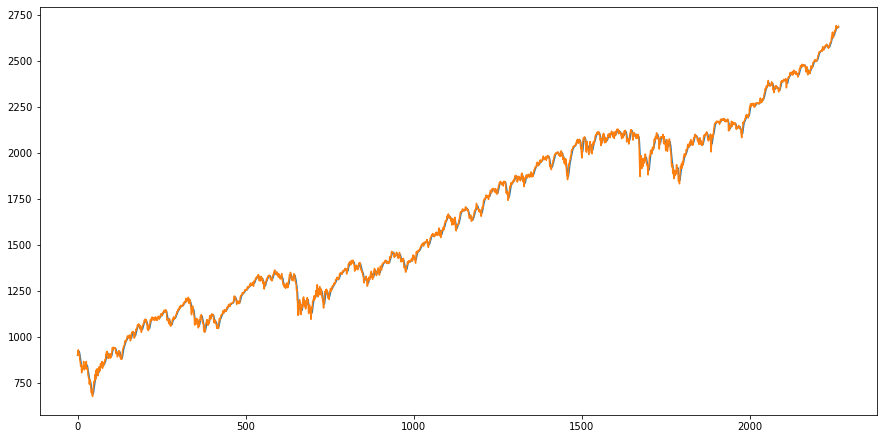

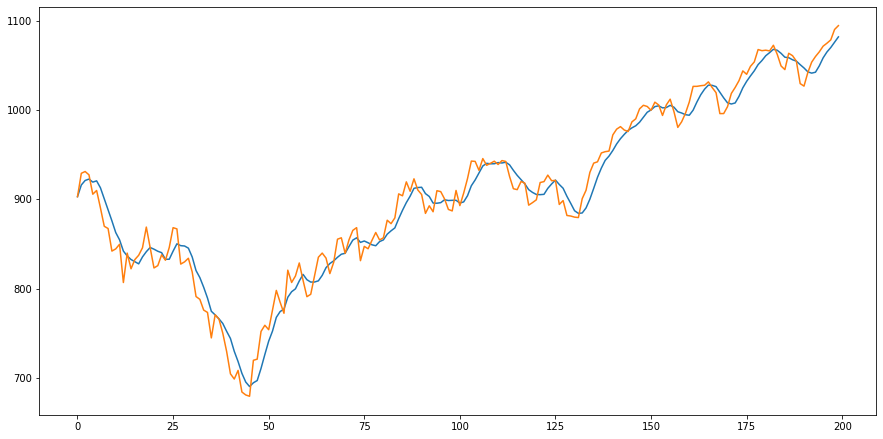

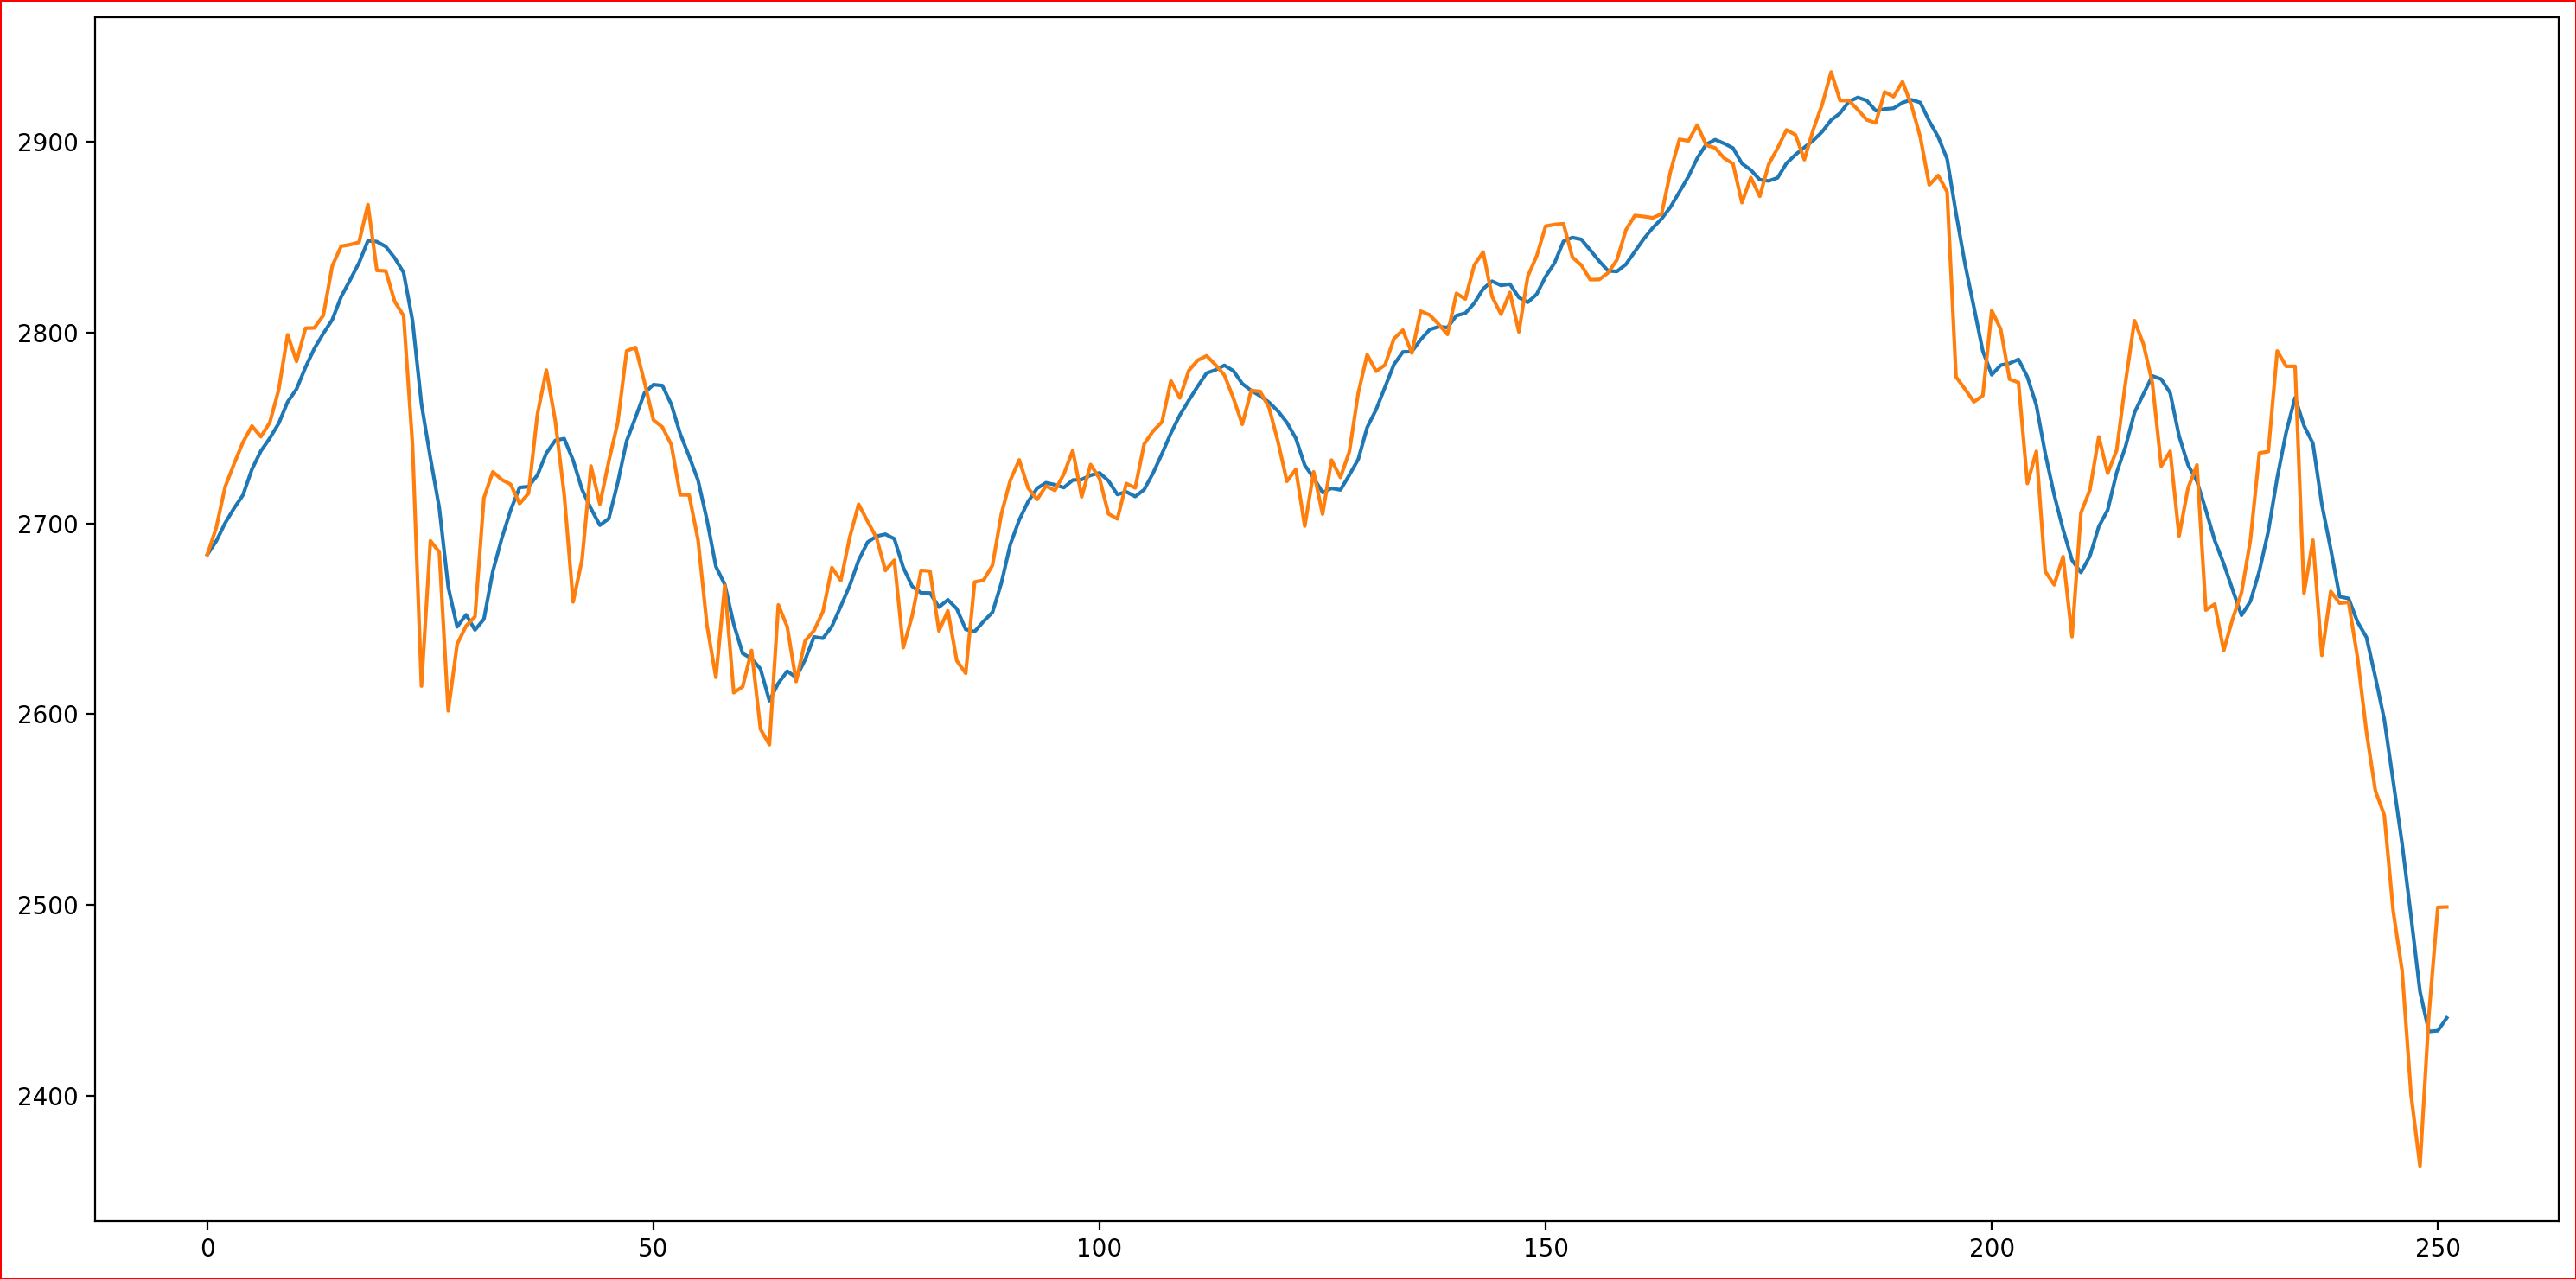

             Date  Open Price  Close Price  High Price  Low Price      Volume  \
0     02-Jan-2009      902.99       931.80      934.73     899.35  4048270080   
1     05-Jan-2009      929.17       927.45      936.63     919.53  5413910016   
2     06-Jan-2009      931.17       934.70      943.85     927.28  5392620032   
3     07-Jan-2009      927.45       906.65      927.45     902.37  4704940032   
4     08-Jan-2009      905.73       909.73      910.00     896.81  4991549952   
...           ...         ...          ...         ...        ...         ...   
2511  24-Dec-2018     2400.56      2351.10     2410.34    2351.10  1662758784   
2512  26-Dec-2018     2363.12      2467.70     2467.76    2346.58  2611875072   
2513  27-Dec-2018     2442.50      2488.83     2489.10    2397.94  2386466304   
2514  28-Dec-2018     2498.77      2485.74     2520.27    2472.89  2080726656   
2515  31-Dec-2018     2498.94      2506.85     2509.24    2482.82  1912680064   

      season  slope_result 

In [14]:

#5 day moveing average with Open Price
#train data
week_average = []
mask = np.zeros(0)
tmp=0

for i in range(len(train_csv)):
    if(i < 5):
        tmp = tmp + data['Open Price'][i]
        week_average.append(tmp/(i+1))
    else:
        tmp = tmp + data['Open Price'][i] -data['Open Price'][i - 5]
        week_average.append(tmp/5)
plt.figure(figsize = (15, 7.5))
plt.plot(range(len(train_csv)), week_average)
plt.plot(range(len(train_csv)), data['Open Price'][:len(train_csv)])
plt.show()


plt.figure(figsize = (15, 7.5))
plt.plot(range(200), week_average[:200])
plt.plot(range(200), data['Open Price'][:200])
plt.show()

#test data
tmp=0
for i in range(len(train_csv), len(train_csv)+len(test_csv)):
    #print(i)
    if(i < len(train_csv)+5):
        tmp = tmp + data['Open Price'][i]
        week_average.append(tmp/(i-len(train_csv)+1))
    else:
        tmp = tmp + data['Open Price'][i] -data['Open Price'][i - 5]
        week_average.append(tmp/5)


plt.figure(figsize=(15, 7.5), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')
plt.plot(range(len(test_csv)), week_average[len(train_csv):])
plt.plot(range(len(test_csv)), data['Open Price'][len(train_csv):])
plt.show()


week_slope = [0]
#0 is down 1 is up for 30 days
for i in range(len(data['Open Price'])):
    if(i == 0):
        continue
    if(week_average[i] - week_average[i-1] > 0):
        week_slope.append(1)
    else:
        week_slope.append(0)
week_slope = np.array(week_slope)
data['open_w'] = week_slope
print(data)


## logistic classifier

In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter': [100, 200, 300]
              ,'C' : [1e5, 0.1, 1]
              ,'penalty' :  ['l1', 'l2', 'elasticnet', 'none']
             }

feature = ['slope_d', 'open_w', 'slope_w', 'Volume', 'real_w', 'High Price', 'Open Price', 'Low Price']
train_x = data[:len(train_csv)][feature]
train_y = label[:len(train_csv)]

test_x = data[len(train_csv):][feature]
test_y = label[:len(test_csv)]
print(train_x.head())

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, n_jobs=5,
                        refit=True)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print(predict_y)
print(clf.score(test_x, test_y))
print(clf.best_params_)



   slope_d  open_w  slope_w      Volume    real_w  High Price  Open Price  \
0        0       0        0  4048270080  0.000000      934.73      902.99   
1        0       1       -1  5413910016 -2.175000      936.63      929.17   
2        1       1        1  5392620032  1.691667      943.85      931.17   
3        0       1       -1  4704940032 -6.166667      927.45      927.45   
4        1       0       -1  4991549952 -3.084000      910.00      905.73   

   Low Price  
0     899.35  
1     919.53  
2     927.28  
3     902.37  
4     896.81  
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## neural network

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes' : [(100,), (200, ), (5, 2)]
              ,'learning_rate': ['constant', 'invscaling', 'adaptive']
              ,'learning_rate_init': [0.1, 0.001, 1]
              , 'max_iter':[100,200,300]
              , 'solver':['lbfgs']
              ,'alpha':[1e-5]
             }

feature = ['slope_d', 'Volume', 'season', 'Open Price', 'Low Price', 'High Price', 'real_w']
train_x = data[:len(train_csv)][feature]
train_y = label[:len(train_csv)]

test_x = data[len(train_csv):][feature]
test_y = label[:len(test_csv)]
print(train_x.head())

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1)
clf = GridSearchCV(clf, parameters, n_jobs=5,
                        refit=True)
clf.fit(train_x, train_y)
print(clf.predict(test_x))

print(clf.score(test_x, test_y))

   slope_d      Volume  season  Open Price  Low Price  High Price    real_w
0        0  4048270080       1      902.99     899.35      934.73  0.000000
1        0  5413910016       1      929.17     919.53      936.63 -2.175000
2        1  5392620032       1      931.17     927.28      943.85  1.691667
3        0  4704940032       1      927.45     902.37      927.45 -6.166667
4        1  4991549952       1      905.73     896.81      910.00 -3.084000


## random forest

In [ ]:
feature = ['slope_d', 'slope_m', 'slope_w', 'real_w', 'open_w' , 'Open Price', 'Low Price', 'High Price']
train_x = data[:len(train_csv)][feature]
train_y = label[:len(train_csv)]

test_x = data[len(train_csv):][feature]
test_y = label[:len(test_csv)]
print(train_x.head())

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 250,
                               min_samples_split = 20,
                               oob_score = True,
                               random_state = 4000)
clf.fit(train_x, train_y)
print(clf.predict(test_x))
print(clf.score(test_x, test_y))

## SGD

In [ ]:
feature = ['slope_w', 'slope_d']
train_x = data[:len(train_csv)][feature]
train_y = label[:len(train_csv)]

test_x = data[len(train_csv):][feature]
test_y = label[:len(test_csv)]

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score   

clf = SGDClassifier(loss = 'log', max_iter = 1000, random_state = 100)
clf.fit(train_x, train_y)


print(accuracy_score(clf.predict(test_x), test_y))


## ensemble

In [ ]:
feature = ['slope_w', 'slope_d']
train_x = data[:len(train_csv)][feature]
train_y = label[:len(train_csv)]

test_x = data[len(train_csv):][feature]
test_y = label[:len(test_csv)]

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import KFold  

kfold = StratifiedKFold(n_splits=10)  #做交叉驗證

classifiers = []
cv_results = []
classifiers.append(SVC(random_state=2000))
classifiers.append(DecisionTreeClassifier(random_state=4000))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=0),random_state=0,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=4000))
classifiers.append(ExtraTreesClassifier(random_state=4000))
classifiers.append(GradientBoostingClassifier(random_state=0))
classifiers.append(MLPClassifier(random_state=0))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = 0))
classifiers.append(LinearDiscriminantAnalysis())
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_x, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],   #參數的選擇
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2, 100],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]
              }
#暴利解，尋找最好的參數
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_x,train_y)

ada_best = gsadaDTC.best_estimator_
print(ada_best)

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],                       #參數的選擇
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#暴利解，尋找最好的參數
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_x,train_y)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_
print(ExtC_best)

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],               #參數的選擇
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#暴利解，尋找最好的參數
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(train_x,train_y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_
print(RFC_best)

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],                       #參數的選擇
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
#暴利解，尋找最好的參數
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(train_x,train_y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_
print(GBC_best)

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],                                          #參數的選擇
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
#暴利解，尋找最好的參數
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(train_x, train_y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_
print(SVMC_best)

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

In [ ]:
votingC = votingC.fit(train_x, train_y)

print(votingC.predict(test_x))
print(accuracy_score(votingC.predict(test_x), test_y))